<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/lab6/inclassLab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

hprice = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/lab6/train.csv", na_values = '-')
hprice.head()

Id MSSubClass MSZoning LotFrontage  ... YrSold SaleType SaleCondition SalePrice
0  1         60       RL          65  ...   2008       WD        Normal  208500.0
1  2         20       RL          80  ...   2007       WD        Normal  181500.0
2  3         60       RL          68  ...   2008       WD        Normal  223500.0
3  4         70       RL          60  ...   2006       WD       Abnorml  140000.0
4  5         60       RL          84  ...   2008       WD        Normal  250000.0

[5 rows x 81 columns]

In [15]:
hprice.describe()

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000

In [17]:
hprice.shape

(2920, 81)

In [26]:
hprice.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [36]:
hprice.dropna(axis = 0, subset = ['SalePrice'], inplace = True)
hprice.shape

(1460, 81)

In [47]:
cols = hprice.columns
keepCols = []
for col in cols:
  if 'area' in col.lower():
    keepCols.append(col)
  elif 'year' in col.lower():
    keepCols.append(col)
  elif 'yr' in col.lower():
    keepCols.append(col)
    
keepCols

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'PoolArea',
 'YrSold']

In [56]:
keptData = hprice[keepCols]
keptData.describe()
#keptData.head()

LotArea YearBuilt YearRemodAdd  ... GarageArea PoolArea YrSold
count     1460      1460         1460  ...       1460     1460   1460
unique    1073       112           61  ...        441        8      5
top       7200      2006         1950  ...          0        0   2009
freq        25        67          178  ...         81     1453    338

[4 rows x 9 columns]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


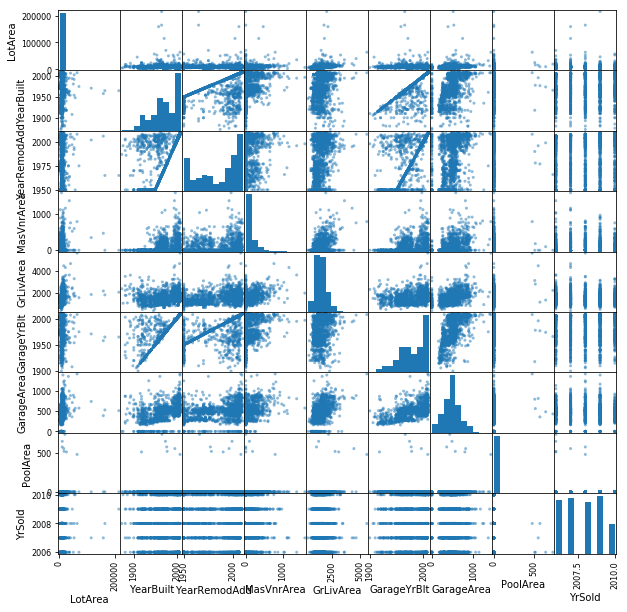

In [66]:
ax = plt.figure(figsize = (10, 10)).add_subplot(1,1,1)
keptData = keptData.astype(np.float)
pd.plotting.scatter_matrix(keptData, ax = ax);

In [77]:
mean = hprice['SalePrice'].mean()
aboveMean = hprice[~(hprice['SalePrice'] > mean)]
aboveMean.shape

(900, 81)